Leistungsnachweis Coding in GIS

Zusatzauftrag

In [1]:
# Benötigten Module laden #####################
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
###############################################

In [2]:
# Notwendige Functions definieren #############
def offset_coordinate(old, distance = 100):
    import random
    new = old + random.normalvariate(0,distance)
    return(new)
###############################################

In [3]:
# Daten Importieren ###########################
zeckenstiche = pd.read_csv("zeckenstiche_full.csv")
wald = gpd.read_file("wald.gpkg")
###############################################

In [13]:
# Daten Simulieren ############################
monte_carlo = []
for r in [1000, 100, 10]: 
    for i in range(50):
        zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate, distance = r)
        zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate, distance = r)
        zeckenstiche["Run"] = i
        monte_carlo.append(zeckenstiche.copy())
        zeckenstiche["Radius"] = r
monte_carlo_df = pd.concat(monte_carlo)
###############################################

In [14]:
import geopandas as gpd

monte_carlo_gpd = gpd.GeoDataFrame(monte_carlo_df, # die Basis-DataFrame / die "Attributtabelle"
                                    # die Geometrie Spalte:
                                    geometry=gpd.points_from_xy(monte_carlo_df['x_sim'], monte_carlo_df['y_sim']),
                                    crs = 2056) # EPSG Code des Koordinatenbezugssystem

In [7]:
monte_carlo_gpd

,ID,accuracy,x,y,x_sim,y_sim,Run,Radius,geometry
0,0,65.617154,2678971.0,1240824.0,2.678532e+06,1.241402e+06,0,NaN,POINT (2678531.657 1241401.721)
1,1,257.492052,2679837.0,1240858.0,2.679196e+06,1.240827e+06,0,NaN,POINT (2679196.469 1240827.199)
2,2,163.533834,2687539.0,1240881.0,2.687004e+06,1.239230e+06,0,NaN,POINT (2687004.034 1239229.901)
3,3,185.000000,2674848.0,1240913.0,2.674420e+06,1.241077e+06,0,NaN,POINT (2674419.734 1241076.877)
4,4,228.215231,2681771.0,1240922.0,2.682475e+06,1.240469e+06,0,NaN,POINT (2682475.321 1240468.896)
...,...,...,...,...,...,...,...,...,...
1071,1071,109.531946,2678005.0,1257344.0,2.677999e+06,1.257351e+06,49,100.0,POINT (2677999.321 1257350.651)
1072,1072,100.489274,2678005.0,1257347.0,2.678005e+06,1.257352e+06,49,100.0,POINT (2678004.682 1257351.607)
1073,1073,301.748529,2689893.0,1257351.0,2.689904e+06,1.257341e+06,49,100.0,POINT (2689904.005 1257340.990)
1074,1074,301.748542,2690668.0,1257369.0,2.690672e+06,1.257356e+06,49,100.0,POINT (2690671.830 1257356.328)


In [15]:
monte_carlo_join = gpd.sjoin(left_df = monte_carlo_gpd, right_df = wald)

In [10]:
monte_carlo_join

,ID,accuracy,x,y,x_sim,y_sim,Run,Radius,geometry,index_right,Shape_Area,Wald_text
0,0,65.617154,2678971.0,1240824.0,2.678532e+06,1.241402e+06,0,NaN,POINT (2678531.657 1241401.721),1,7.963237e+07,ja
1,1,257.492052,2679837.0,1240858.0,2.679196e+06,1.240827e+06,0,NaN,POINT (2679196.469 1240827.199),1,7.963237e+07,ja
5,5,257.492053,2690119.0,1240932.0,2.691992e+06,1.241553e+06,0,NaN,POINT (2691992.057 1241553.089),1,7.963237e+07,ja
12,12,301.748542,2681279.0,1241158.0,2.679079e+06,1.242602e+06,0,NaN,POINT (2679078.591 1242601.795),1,7.963237e+07,ja
14,14,354.947264,2681591.0,1241228.0,2.681982e+06,1.240820e+06,0,NaN,POINT (2681982.163 1240819.802),1,7.963237e+07,ja
...,...,...,...,...,...,...,...,...,...,...,...,...
1068,1068,301.748529,2689854.0,1257328.0,2.689848e+06,1.257343e+06,49,100.0,POINT (2689848.172 1257342.744),0,2.380876e+08,nein
1069,1069,301.748542,2689876.0,1257333.0,2.689892e+06,1.257327e+06,49,100.0,POINT (2689891.865 1257327.246),0,2.380876e+08,nein
1070,1070,301.748542,2689854.0,1257341.0,2.689839e+06,1.257355e+06,49,100.0,POINT (2689838.659 1257355.129),0,2.380876e+08,nein
1073,1073,301.748529,2689893.0,1257351.0,2.689904e+06,1.257341e+06,49,100.0,POINT (2689904.005 1257340.990),0,2.380876e+08,nein


In [11]:
monte_carlo_join.sort_values("Radius")

,ID,accuracy,x,y,x_sim,y_sim,Run,Radius,geometry,index_right,Shape_Area,Wald_text
1074,1074,301.748542,2690668.0,1257369.0,2.690672e+06,1.257356e+06,49,100.0,POINT (2690671.830 1257356.328),0,2.380876e+08,nein
589,589,18.900593,2675370.0,1249218.0,2.675363e+06,1.249201e+06,25,100.0,POINT (2675362.739 1249200.681),1,7.963237e+07,ja
590,590,257.492053,2676851.0,1249231.0,2.676858e+06,1.249226e+06,25,100.0,POINT (2676858.454 1249225.808),1,7.963237e+07,ja
591,591,75.020801,2684347.0,1249237.0,2.684356e+06,1.249238e+06,25,100.0,POINT (2684355.597 1249238.179),1,7.963237e+07,ja
592,592,204.000000,2676437.0,1249263.0,2.676425e+06,1.249254e+06,25,100.0,POINT (2676424.746 1249254.445),1,7.963237e+07,ja
...,...,...,...,...,...,...,...,...,...,...,...,...
1064,1064,257.492053,2690725.0,1257141.0,2.690001e+06,1.254149e+06,49,NaN,POINT (2690000.923 1254149.185),0,2.380876e+08,nein
1066,1066,235.000000,2674504.0,1257258.0,2.674381e+06,1.257105e+06,49,NaN,POINT (2674381.299 1257105.379),0,2.380876e+08,nein
1068,1068,301.748529,2689854.0,1257328.0,2.690938e+06,1.256145e+06,49,NaN,POINT (2690937.910 1256145.466),0,2.380876e+08,nein
1070,1070,301.748542,2689854.0,1257341.0,2.690301e+06,1.256569e+06,49,NaN,POINT (2690301.155 1256568.846),0,2.380876e+08,nein


In [12]:
monte_carlo_join.sort_values("Run")

,ID,accuracy,x,y,x_sim,y_sim,Run,Radius,geometry,index_right,Shape_Area,Wald_text
0,0,65.617154,2678971.0,1240824.0,2.678532e+06,1.241402e+06,0,NaN,POINT (2678531.657 1241401.721),1,7.963237e+07,ja
876,876,64.373013,2681190.0,1253279.0,2.681200e+06,1.253287e+06,0,100.0,POINT (2681200.246 1253287.035),0,2.380876e+08,nein
878,878,16.093254,2687537.0,1253305.0,2.687536e+06,1.253295e+06,0,100.0,POINT (2687536.256 1253294.697),0,2.380876e+08,nein
879,879,6.902978,2681546.0,1253322.0,2.681549e+06,1.253331e+06,0,100.0,POINT (2681549.143 1253331.458),0,2.380876e+08,nein
880,880,257.492053,2682724.0,1253499.0,2.682720e+06,1.253514e+06,0,100.0,POINT (2682720.195 1253513.545),0,2.380876e+08,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
81,81,24.000000,2678481.0,1242537.0,2.678535e+06,1.242506e+06,49,1000.0,POINT (2678534.595 1242505.545),0,2.380876e+08,nein
80,80,34.000000,2678483.0,1242535.0,2.678415e+06,1.242448e+06,49,1000.0,POINT (2678415.480 1242447.705),0,2.380876e+08,nein
79,79,12.000000,2678480.0,1242532.0,2.678337e+06,1.242671e+06,49,1000.0,POINT (2678337.472 1242670.666),0,2.380876e+08,nein
86,86,330.000000,2681366.0,1242662.0,2.681424e+06,1.242731e+06,49,1000.0,POINT (2681423.534 1242731.112),0,2.380876e+08,nein


In [13]:
monte_carlo_join.sort_values("ID")

,ID,accuracy,x,y,x_sim,y_sim,Run,Radius,geometry,index_right,Shape_Area,Wald_text
0,0,65.617154,2678971.0,1240824.0,2.678532e+06,1.241402e+06,0,NaN,POINT (2678531.657 1241401.721),1,7.963237e+07,ja
0,0,65.617154,2678971.0,1240824.0,2.678923e+06,1.240840e+06,11,1000.0,POINT (2678922.716 1240839.917),1,7.963237e+07,ja
0,0,65.617154,2678971.0,1240824.0,2.678945e+06,1.240912e+06,12,1000.0,POINT (2678945.015 1240911.968),1,7.963237e+07,ja
0,0,65.617154,2678971.0,1240824.0,2.679112e+06,1.240818e+06,13,1000.0,POINT (2679112.467 1240818.057),1,7.963237e+07,ja
0,0,65.617154,2678971.0,1240824.0,2.678989e+06,1.240821e+06,7,100.0,POINT (2678989.143 1240820.510),1,7.963237e+07,ja
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1075,226.000000,2682852.0,1257531.0,2.682856e+06,1.257472e+06,22,1000.0,POINT (2682856.009 1257472.287),1,7.963237e+07,ja
1075,1075,226.000000,2682852.0,1257531.0,2.682857e+06,1.257522e+06,0,100.0,POINT (2682856.667 1257521.521),1,7.963237e+07,ja
1075,1075,226.000000,2682852.0,1257531.0,2.682855e+06,1.257537e+06,48,100.0,POINT (2682854.691 1257537.280),1,7.963237e+07,ja
1075,1075,226.000000,2682852.0,1257531.0,2.682839e+06,1.257479e+06,23,1000.0,POINT (2682839.324 1257478.940),1,7.963237e+07,ja


In [14]:

monte_carlo_join.groupby(["Run"]).size()

Run
0     3167
1     3163
2     3169
3     3175
4     3169
5     3172
6     3167
7     3175
8     3162
9     3174
10    3174
11    3169
12    3170
13    3181
14    3162
15    3178
16    3168
17    3159
18    3172
19    3174
20    3167
21    3166
22    3166
23    3170
24    3173
25    3176
26    3179
27    3177
28    3173
29    3161
30    3170
31    3165
32    3182
33    3173
34    3179
35    3175
36    3169
37    3160
38    3166
39    3181
40    3167
41    3161
42    3170
43    3171
44    3165
45    3173
46    3164
47    3175
48    3177
49    3174
dtype: int64

In [15]:
monte_carlo_join.groupby(["Run","Wald_text"]).size() 

Run  Wald_text
0    ja           1281
     nein         1886
1    ja           1279
     nein         1884
2    ja           1293
                  ... 
47   nein         1898
48   ja           1288
     nein         1889
49   ja           1281
     nein         1893
Length: 100, dtype: int64

In [16]:

monte_carlo_join.groupby(["Run","Wald_text"]).size().unstack()

Wald_text,ja,nein
Run,,
0,1281,1886
1,1279,1884
2,1293,1876
3,1302,1873
4,1263,1906
5,1295,1877
6,1261,1906
7,1318,1857
8,1288,1874


In [7]:

monte_carlo_results = monte_carlo_join.groupby(["Run","Wald_text"]).size().unstack(fill_value = 0)

monte_carlo_results

Wald_text,ja,nein
Run,,
0,1277,1891
1,1284,1884
2,1275,1897
3,1288,1883
4,1275,1898
5,1275,1890
6,1281,1891
7,1292,1892
8,1287,1889


In [18]:

monte_carlo_results["ja_anteil"] = monte_carlo_results["ja"] / (monte_carlo_results["ja"] + monte_carlo_results["nein"])

In [19]:
monte_carlo_results

Wald_text,ja,nein,ja_anteil
Run,,,
0,1281,1886,0.404484
1,1279,1884,0.404363
2,1293,1876,0.408015
3,1302,1873,0.410079
4,1263,1906,0.398548
5,1295,1877,0.408260
6,1261,1906,0.398169
7,1318,1857,0.415118
8,1288,1874,0.407337


<AxesSubplot:xlabel='Run'>

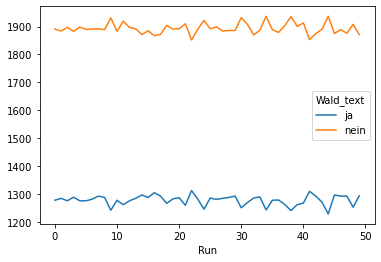

In [17]:
monte_carlo_results.plot()

<AxesSubplot:>

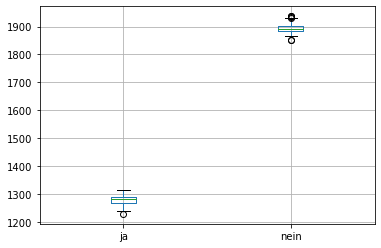

In [18]:
monte_carlo_results.boxplot()

In [19]:
results = monte_carlo_join.groupby(["Radius","Run","Wald_text"]).size().unstack(fill_value = 0).assign(ja_anteil = lambda x: x.ja/(x.ja+x.nein))
              

In [12]:
results.index

MultiIndex([( 100.0,  0),
            ( 100.0,  1),
            ( 100.0,  2),
            ( 100.0,  3),
            ( 100.0,  4),
            ( 100.0,  5),
            ( 100.0,  6),
            ( 100.0,  7),
            ( 100.0,  8),
            ( 100.0,  9),
            ( 100.0, 10),
            ( 100.0, 11),
            ( 100.0, 12),
            ( 100.0, 13),
            ( 100.0, 14),
            ( 100.0, 15),
            ( 100.0, 16),
            ( 100.0, 17),
            ( 100.0, 18),
            ( 100.0, 19),
            ( 100.0, 20),
            ( 100.0, 21),
            ( 100.0, 22),
            ( 100.0, 23),
            ( 100.0, 24),
            ( 100.0, 25),
            ( 100.0, 26),
            ( 100.0, 27),
            ( 100.0, 28),
            ( 100.0, 29),
            ( 100.0, 30),
            ( 100.0, 31),
            ( 100.0, 32),
            ( 100.0, 33),
            ( 100.0, 34),
            ( 100.0, 35),
            ( 100.0, 36),
            ( 100.0, 37),
            

<AxesSubplot:title={'center':'ja_anteil'}, xlabel='Radius'>

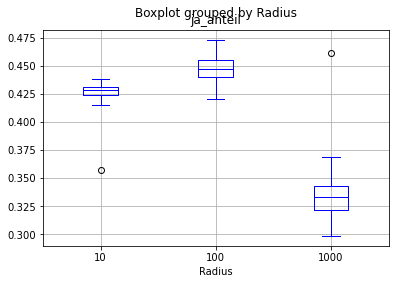

In [20]:
                                                               
results.boxplot(column = "ja_anteil",by = "Radius", color = "blue")